## Data

The stroke data set was provided by McKinsey & Company for a hackathon event hosted by 
    Analytics Vidhya.    

## Brief Description of Variables

Total number of variables = 11

Target = stroke

Number of entries = 43400

Descrition of variables

    id = Patient ID
    gender = Gender of the patient 
    age = Patient’s age
    hypertention = Suffering from hypertension?
    heart_disease = Presence of heart disease? 
    ever_married = Ever Married?
    work_type = Type of occupation
    residence_type = Area type of resident 
    avg_glucose_level = Average glucose level after a meal
    bmi = Body mass index
    smoking_status = Smoking status
    Stroke = Has suffered or is suffering from stroke?
   

## Import modules

In [54]:
# Standard libraries
import pandas as pd
import numpy as np

# PostgreSQL database adapter
from psycopg2 import connect

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data Pre-Processing

In [55]:
# Set up the requirement for connecting to the database, 'patient_data' in PostgreSQL server 

params = {
    'host': '127.0.0.1',   # local host
    'port': 5432,
    'database': 'patient_data'
}

conn = connect(**params)

In [56]:
# Load the table 'stroke' into a Pandas' dataframe 
df = pd.read_sql_query('SELECT * FROM stroke', con=conn)
df.info()
# Set patients id as index as well
df.set_index([df.index.values,'id'], drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


## Data Exploration and Visualization

In [57]:
# Size of data
df.shape

(43400, 11)

In [58]:
# Look the content in the data
df.head(5)

,,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
,id,,,,,,,,,,,
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,None,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,None,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,None,0


There are 8 nominal categorical features. The next step is to find out the in the categorical features

In [59]:
# Find out the high level information in the data, i.e., the variables' data type, sizes and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 43400 entries, (0, 30669) to (43399, 36271)
Data columns (total 11 columns):
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.6+ MB


In [60]:
df_NaN = df[df['bmi'].isnull() & df['smoking_status'].isnull()]
print(df_NaN.head(5))
print(df_NaN.shape)
del df_NaN

           gender   age  hypertension  heart_disease ever_married work_type  \
    id                                                                        
231 22470    Male  61.0             0              0          Yes  Govt_job   
407 27419  Female  59.0             0              0          Yes   Private   
503 33723  Female   9.0             0              0           No  children   
747 8213     Male  78.0             0              1          Yes   Private   
883 809      Male  13.0             0              0           No  children   

          residence_type  avg_glucose_level  bmi smoking_status  stroke  
    id                                                                   
231 22470          Urban             184.15  NaN           None       0  
407 27419          Rural              76.15  NaN           None       1  
503 33723          Urban              95.81  NaN           None       0  
747 8213           Urban             219.84  NaN           None       1  
88

There are 426 missing observations in both bmi and smoking_status columns 

In [61]:
# Set all the plots' style
sns.set_style("whitegrid")


target: stroke
0    0.981959
1    0.018041
Name: stroke, dtype: float64


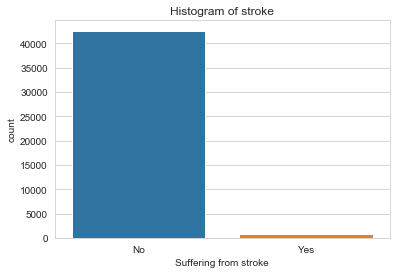

In [62]:
# Find out more about the target variable
    # Plot the class distrbution of the stroke data
sns.countplot(x='stroke', data=df)
plt.title('Histogram of stroke')
plt.xlabel('Suffering from stroke')
plt.ylabel('count')
plt.xticks(ticks=[0,1],labels=['No','Yes'])

print('\ntarget: stroke')
print(df['stroke'].value_counts(normalize=True))

The percentage of patients who haven't had a stroke is around 98.2%. This is a obvious case of class imbalance.


feature: gender
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64


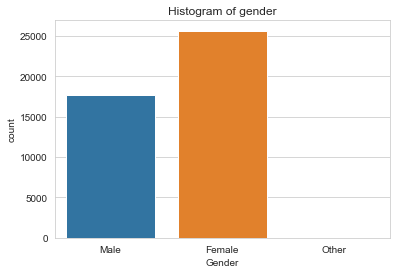

In [63]:
# Find out more about the catagorical features
    #https://seaborn.pydata.org/tutorial/categorical.html
    # Plot the distribution of gender
sns.countplot(x='gender', data=df)
plt.title('Histogram of gender')
plt.xlabel('Gender')
plt.ylabel('count')

print('\nfeature: gender')
print(df['gender'].value_counts())


feature: hypertension
0    39339
1     4061
Name: hypertension, dtype: int64


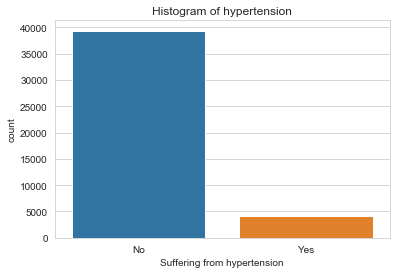

In [64]:
# Find out more about the catagorical features
    # Plot the distribution of hypertension
sns.countplot(x='hypertension', data=df)
plt.title('Histogram of hypertension')
plt.xlabel('Suffering from hypertension')
plt.ylabel('count')
plt.xticks(ticks=[0,1],labels=['No','Yes'])

print('\nfeature: hypertension')
print(df['hypertension'].value_counts())



feature: heart_disease
0    41338
1     2062
Name: heart_disease, dtype: int64


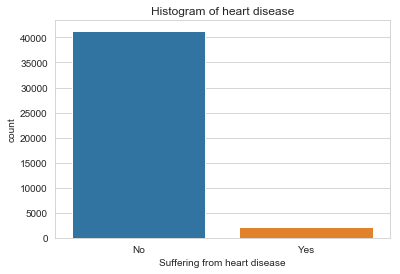

In [65]:
# Find out more about the catagorical features
    # Plot the distribution of heart disease
sns.countplot(x='heart_disease', data=df)
plt.title('Histogram of heart disease')
plt.xlabel('Suffering from heart disease')
plt.ylabel('count')
plt.xticks(ticks=[0,1],labels=['No','Yes'])

print('\nfeature: heart_disease')
print(df['heart_disease'].value_counts())



feature: ever_married
Yes    27938
No     15462
Name: ever_married, dtype: int64


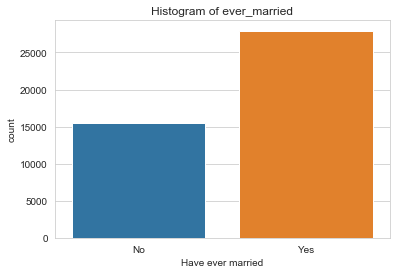

In [66]:
# Find out more about the catagorical features
    # Plot the distribution of ever_married
sns.countplot(x='ever_married', data=df)
plt.title('Histogram of ever_married')
plt.xlabel('Have ever married')
plt.ylabel('count')

print('\nfeature: ever_married')
print(df['ever_married'].value_counts())



feature: work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64


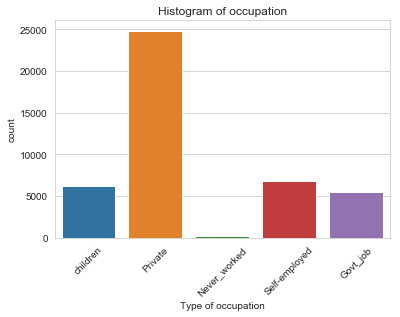

In [67]:
# Find out more about the catagorical features
    # Plot the distribution of work_type
sns.countplot(x='work_type', data=df)
plt.title('Histogram of occupation')
plt.xlabel('Type of occupation')
plt.ylabel('count')
plt.xticks(rotation=45)

print('\nfeature: work_type')
print(df['work_type'].value_counts())




feature: Residence_type
Urban    21756
Rural    21644
Name: residence_type, dtype: int64


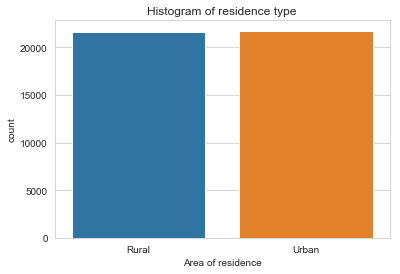

In [68]:
# Find out more about the catagorical features
    # Plot the distribution of Residence_type
sns.countplot(x='residence_type', data=df)
plt.title('Histogram of residence type')
plt.xlabel('Area of residence')
plt.ylabel('count')

print('\nfeature: Residence_type')
print(df['residence_type'].value_counts())



feature: smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


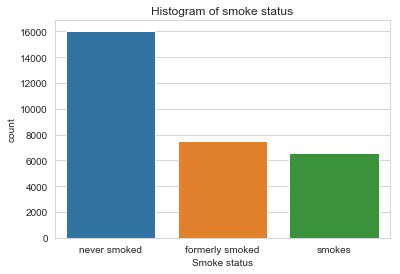

In [69]:
# Find out more about the catagorical features
    # Plot the distribution of smoking_status
sns.countplot(x='smoking_status', data=df)
plt.title('Histogram of smoke status')
plt.xlabel('Smoke status')
plt.ylabel('count')

print('\nfeature: smoking_status')
print(df['smoking_status'].value_counts())

/Applications/Research/anaconda3/envs/metis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Number of children below 11 years old =  (4598, 11)
Number of children below 17 years old =  (7066, 11)


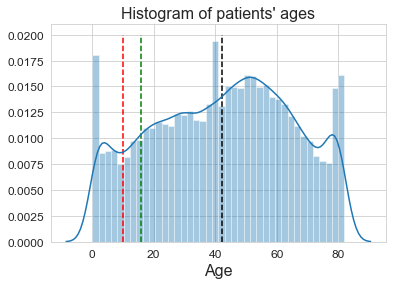

In [70]:
# Find out the summary in the numerical features.
    # Plot the distribution of age (tried several bin sizes. The default bins=40 is the best)
sns.distplot(df['age'])
plt.vlines(round(df['age'].mean(),2), 0, 0.02, colors='k', linestyles='dashed')
plt.vlines(10, 0, 0.02, colors='r', linestyles='dashed')
plt.vlines(16, 0, 0.02, colors='g', linestyles='dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Histogram of patients' ages", fontsize=16)
plt.xlabel('Age', fontsize=16)

print('Number of children below 11 years old = ', df[df['age'] < 11].shape)
print('Number of children below 17 years old = ', df[df['age'] < 17].shape)


In [71]:
print('\nfeature: age')
print(df['age'].describe())



feature: age
count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64


Mode of avg_glucose_level =  0    82.71
dtype: float64


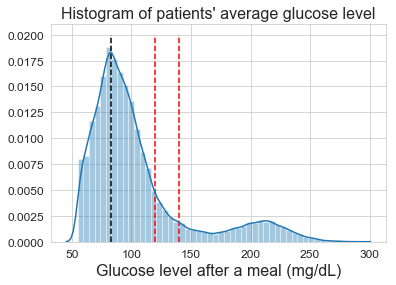

In [72]:
# Find out the summary in the numerical features.
    # Plot the distribution of avg_glucose_level
sns.distplot(df['avg_glucose_level'])
plt.vlines(round(df['avg_glucose_level'].mode(),2), 0, 0.02, colors='k', linestyles='dashed')
plt.vlines(120, 0, 0.02, colors='r', linestyles='dashed')
plt.vlines(140, 0, 0.02, colors='r', linestyles='dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Histogram of patients' average glucose level", fontsize=16)
plt.xlabel('Glucose level after a meal (mg/dL)', fontsize=16)

print('Mode of avg_glucose_level = ', df['avg_glucose_level'].mode())

The red lines indicates the normal glucose level (120-140 mg/dL) 2 hours after a meal. Patients with glucose level within 140 to 200 are at the prediabetic condition. Any level that is 200 or more is an indication that the patient is diagnosed with diabetes.

Reference: https://diabetesaction.org/questions-blood-sugar

In [73]:
print('\nfeature: avg_glucose_level')
print(df['avg_glucose_level'].describe())



feature: avg_glucose_level
count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64


Text(0.5, 0, 'bmi')

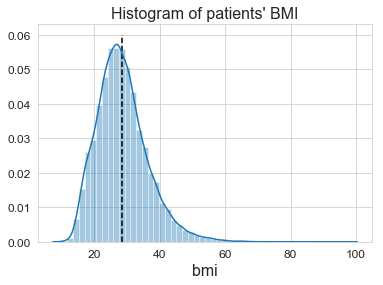

In [74]:
# Find out the summary in the numerical features.
    # Plot the distribution of bmi
sns.distplot(df['bmi'].dropna(axis=0))
plt.vlines(round(df['bmi'].mean(),2), 0, 0.06, colors='k', linestyles='dashed')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Histogram of patients' BMI", fontsize=16)
plt.xlabel('bmi',fontsize=16)

In [75]:
print('\nfeature: bmi')
print(df['bmi'].describe())


feature: bmi
count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64


# The missing observations in bmi and smoking

In [76]:
# Check the number of missing observations in bmi and smoking_status columns
df_NaN = df[df['bmi'].isnull() & df['smoking_status'].isnull()]
print(df_NaN.head(5))
print(df_NaN.shape)
del df_NaN

           gender   age  hypertension  heart_disease ever_married work_type  \
    id                                                                        
231 22470    Male  61.0             0              0          Yes  Govt_job   
407 27419  Female  59.0             0              0          Yes   Private   
503 33723  Female   9.0             0              0           No  children   
747 8213     Male  78.0             0              1          Yes   Private   
883 809      Male  13.0             0              0           No  children   

          residence_type  avg_glucose_level  bmi smoking_status  stroke  
    id                                                                   
231 22470          Urban             184.15  NaN           None       0  
407 27419          Rural              76.15  NaN           None       1  
503 33723          Urban              95.81  NaN           None       0  
747 8213           Urban             219.84  NaN           None       1  
88

Variables bmi and smoking_status have missing values. Among them, there are 426 entries with missing values for both bmi and smoking_status features. (See data frame, df_NaN below)

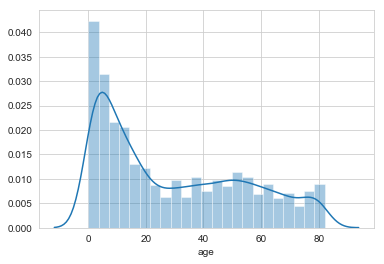

In [97]:
# Plot the age distribution for the missing observations in smoking_status
df_temp = df[df['smoking_status'].isnull()]
sns.distplot(df_temp['age'])

In [98]:
len(df_temp[df_temp['age'] < 17])

5936

I am assuming that patients who are aged 16 and below don't smoke. These 5936 missing observations are 
imputed to be never_smoked. 

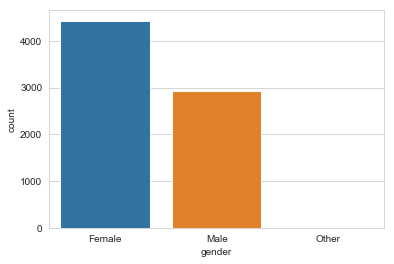

In [99]:
# Plot the gender distribution for age > 16 years old for the missing observations in smoking_status
sns.countplot(x='gender', data=df_temp[df_temp['age'] > 16])
#del df_temp

In [105]:
df.groupby('smoking_status').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,
formerly smoked,54.278126,0.139330,0.086347,111.565856,30.709917,0.029494
never smoked,45.565626,0.108889,0.037625,105.171795,29.793656,0.017691
smokes,46.488723,0.112161,0.065072,107.125355,29.965355,0.020268



The earlier bar graph shows the significantly large number of patients who 

In [111]:
# Apply one-hot encoding to nominal categorical features
df_d = df.copy()
df_d = pd.get_dummies(df_d, prefix='gender', columns=['gender'])
df_d = pd.get_dummies(df_d, prefix='hypertension', columns=['hypertension'])
df_d = pd.get_dummies(df_d, prefix='heart_disease', columns=['heart_disease'])
df_d = pd.get_dummies(df_d, columns=['ever_married'])
df_d = pd.get_dummies(df_d, prefix='work_type', columns=['work_type'])
df_d = pd.get_dummies(df_d, prefix='residence_type', columns=['residence_type'])
df_d = pd.get_dummies(df_d, prefix='smoking_status', columns=['smoking_status'])

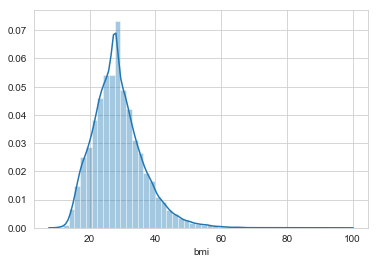

In [118]:
# Handle the missing values in the bmi feature
#     Replace the missing values with median instead of mean to handle future skewed data
#     If the distribution isn't skewed, the bmi's mean and median should be close
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df_d['bmi'].fillna(df_d['bmi'].median(), inplace=True)
sns.distplot(df_d['bmi'])

In [119]:
# Handle the missing values in the smoke_status feature
#     Remove all the null entries
df_d_clean = df_d.dropna(axis=0, how='any', inplace=False)

In [115]:
df_d_clean.groupby('stroke').mean()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
stroke,,,,,,,,,,,,,,,,,,,,,
0,41.741565,104.021590,28.557906,0.592111,0.407631,0.000258,0.909402,0.090598,0.955769,0.044231,...,0.125560,0.004153,0.572377,0.153507,0.144402,0.498862,0.501138,0.170636,0.370017,0.150855
1,68.143448,129.582669,29.480460,0.550447,0.449553,0.000000,0.744572,0.255428,0.773946,0.226054,...,0.113665,0.000000,0.563218,0.320562,0.002554,0.490421,0.509579,0.282248,0.362708,0.169860


Ignoring the categorical features (hypertension and heart_disease) and the label variable (i.e., patient's id), it seems on average, patients in higher age group are risked of having stroke. The average of avg_glocose levels after eating are lower than the normal level (less than 140 mg/dL 2 hrs after eating according to WebMD). The average bmi values for the stroke clases are similar. The pair-plot below comfirmed that weak relationship between bmi and stroke.

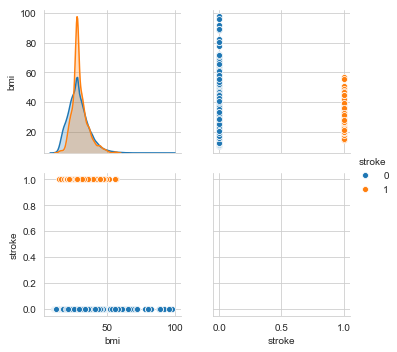

In [121]:
df_temp = pd.DataFrame()
df_temp['bmi'] = df['bmi']
df_temp['stroke'] = df['stroke']
df_temp.dropna()
df_temp.head()
sns.pairplot(df_temp, hue='stroke')
del df_temp